In [1]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

Unique ROIs in the atlas: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116.]
Filtered atlas saved as 'filtered_ez_roi_atlas.nii'.


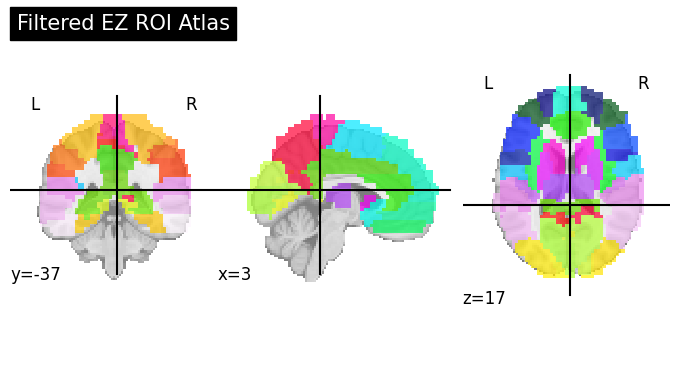

In [18]:
#first off, manually import ez atlas
#discarding last 26 rois from the atlas

import numpy as np
from nilearn import image, plotting
from nilearn.image import new_img_like

# Step 1: Load the atlas image
atlas_path = "ez_roi_atlas.nii.gz"
atlas_img = image.load_img(atlas_path)

# Step 2: Inspect unique labels in the atlas
atlas_data = atlas_img.get_fdata()
unique_labels = np.unique(atlas_data)
print("Unique ROIs in the atlas:", unique_labels)

# Step 3: Discard the last 26 ROIs
labels_to_keep = unique_labels[:-26]  # All labels except the last 26
filtered_atlas_data = np.where(np.isin(atlas_data, labels_to_keep), atlas_data, 0)

# Step 4: Save the modified atlas
filtered_atlas_img = new_img_like(atlas_img, filtered_atlas_data)
filtered_atlas_img.to_filename("filtered_ez_roi_atlas.nii")
print("Filtered atlas saved as 'filtered_ez_roi_atlas.nii'.")

# Step 5: Visualize the modified atlas (Optional)
plotting.plot_roi(filtered_atlas_img, title="Filtered EZ ROI Atlas")
plotting.show()


In [2]:
#import labels file

labels=list(pd.read_csv(r"C:\Users\USER\Desktop\GNNProject\EZ_atlas_signals\ez_labels.csv", skiprows=1).iloc[:,-1])



In [3]:
labels

['Left Precentral Gyrus',
 'RightPrecentral Gyrus',
 'Left Superior Frontal Gyrus',
 'Right Superior Frontal Gyrus',
 'Left Superior Orbital Gyrus',
 'Right Superior Orbital Gyrus',
 'Left Middle Frontal Gyrus',
 'Right Middle Frontal Gyrus',
 'Left Middle Orbital Gyrus',
 'Right Middle Orbital Gyrus',
 'Left Inferior Frontal Gyrus (p. Opercularis)',
 'Right Inferior Frontal Gyrus (p. Opercularis)',
 'Left Inferior Frontal Gyrus (p. Triangularis)',
 'Right Inferior Frontal Gyrus (p. Triangularis)',
 'Left Inferior Frontal Gyrus (p. Orbitalis)',
 'Right Inferior Frontal Gyrus (p. Orbitalis)',
 'Left Rolandic Operculum',
 'Right Rolandic Operculum',
 'Left SMA',
 'Right SMA',
 'Left Olfactory cortex',
 'Right Olfactory cortex',
 'Left Superior Medial Gyrus',
 'Right Superior Medial Gyrus',
 'Left Mid Orbital Gyrus',
 'Right Mid Orbital Gyrus',
 'Left Rectal Gyrus',
 'Right Rectal Gyrus',
 'Left Insula Lobe',
 'Right Insula Lobe',
 'Left Anterior Cingulate Cortex',
 'Right Anterior Cingul

In [2]:
%%capture
from nilearn.datasets import fetch_abide_pcp

abide_data=fetch_abide_pcp(
                               pipeline="cpac",
                               derivatives=["rois_ez"],
                               band_pass_filtering=True,
                               data_dir="path_to_store_abide_dataset"
                               )


all_signals=[abide_data["rois_ez"][i][:,0:90] for i in range(len(abide_data["rois_ez"]))]


In [3]:
len(all_signals)

871

In [16]:
signal=all_signals[500]

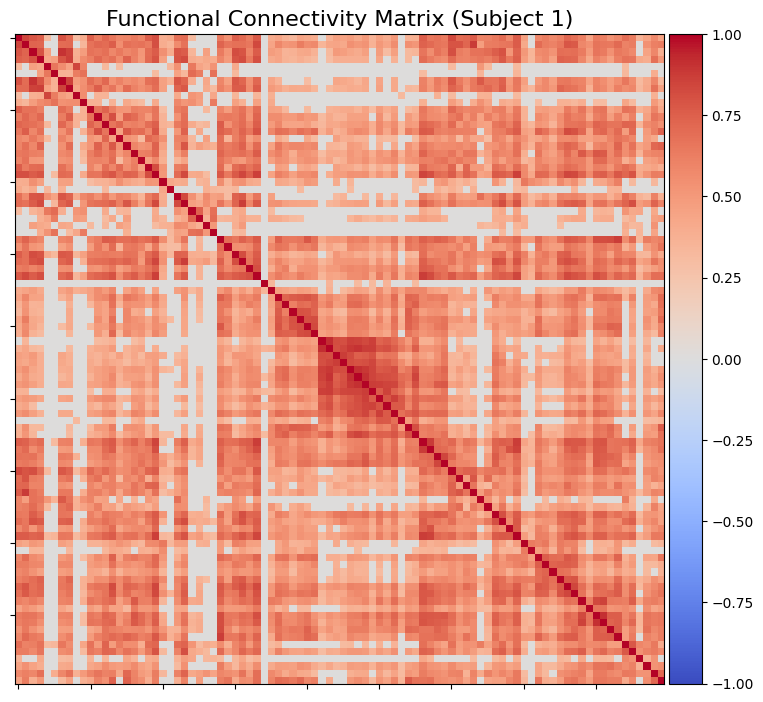

In [34]:
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting

connectome = ConnectivityMeasure(kind='correlation')
correlation_matrix = connectome.fit_transform([signal])[0]
adjacency_matrix=np.copy(correlation_matrix)
np.fill_diagonal(adjacency_matrix,0)
correlation_matrix[(correlation_matrix >= -0.3) & (correlation_matrix <= 0.3)] = 0

plotting.plot_matrix(correlation_matrix, 
                     figure=(7, 7),  # Size of the plot
                     vmax=1, vmin=-1,  # Limits for the color scale
                     title="Functional Connectivity Matrix (Subject 1)", 
                     cmap='coolwarm',  # Color map for the matrix
                     colorbar=True)


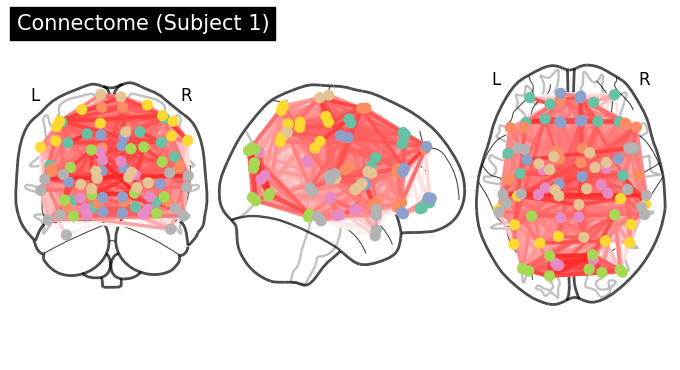

In [23]:
# Step 6: Get the coordinates of the ROIs
coordinates = plotting.find_parcellation_cut_coords(labels_img=filtered_atlas_img)
# Step 7: Plot the connectome with an edge threshold (e.g., 80% of the strongest edges)
connectome = plotting.plot_connectome(
    correlation_matrix, coordinates, title="Connectome (Subject 1)",edge_vmin=correlation_matrix.min(),edge_vmax=correlation_matrix.max()
)

# Step 8: Show the plot

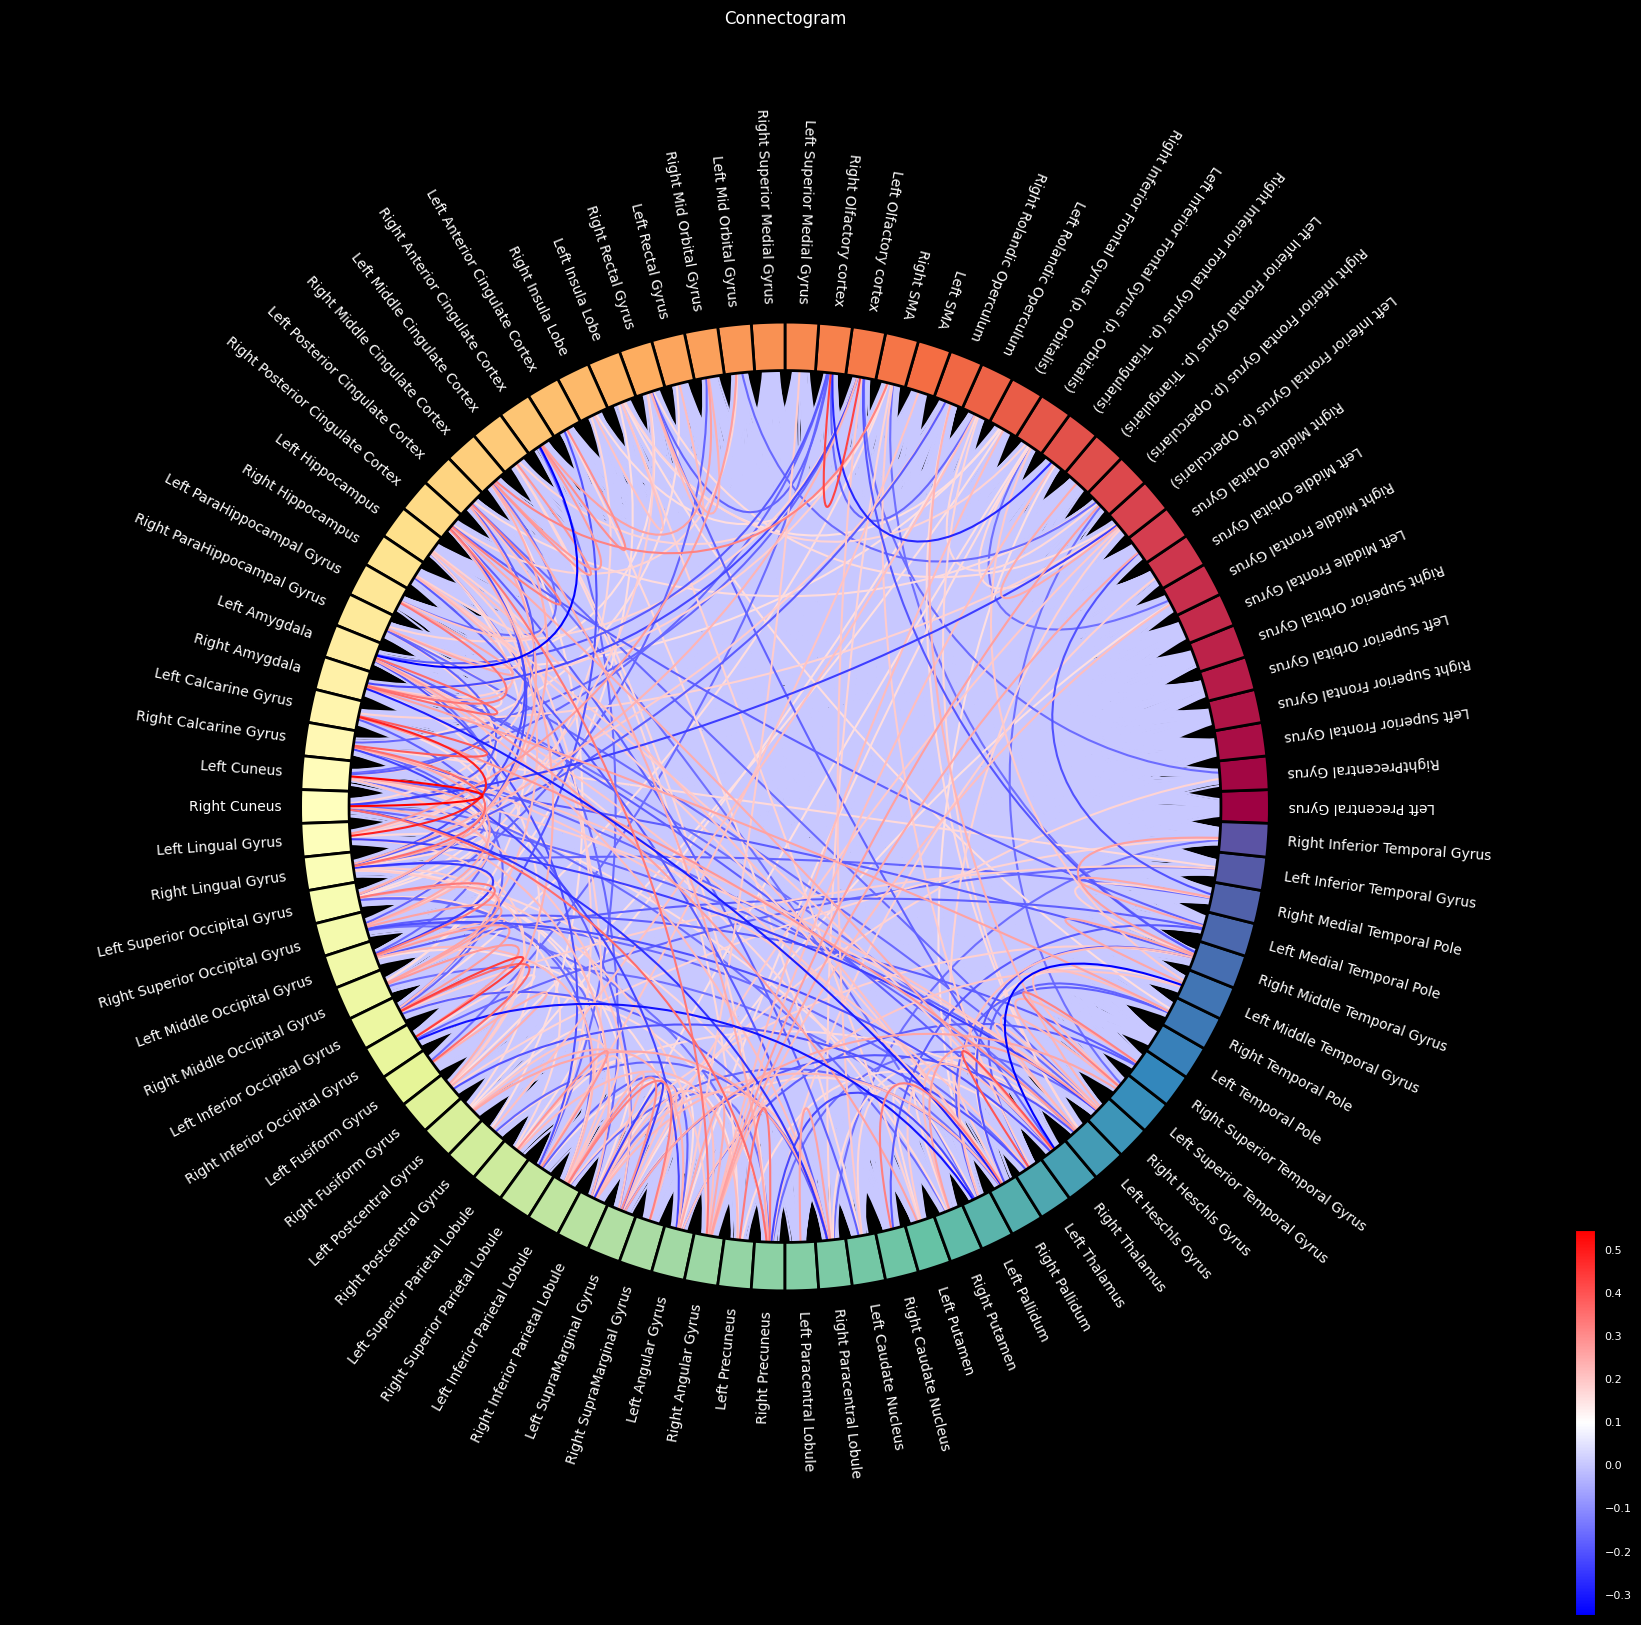

(<Figure size 2500x2500 with 2 Axes>,
 <PolarAxes: title={'center': 'Connectogram'}>)

In [80]:
from mne_connectivity.viz import plot_connectivity_circle


# Generate a random correlation matrix (e.g., 10x10) as an example
corr_matrix = adjacency_matrix  # Make it symmetric (undirected)
corr_matrix[(corr_matrix>-0.5)&(corr_matrix<0.5)]=0

# Use MNE's function to visualize the connectivity matrix as a connectogram
# Define the channel names (or regions of interest for the correlation matrix)
ch_names = labels[0:90]

# Plot the connectogram (circular layout)
fig, ax = plt.subplots(figsize=(25, 25), facecolor="black", subplot_kw=dict(polar=True))
plot_connectivity_circle(corr_matrix, ch_names, title="Connectogram", colormap='bwr',
                          vmin=corr_matrix.min(), vmax=corr_matrix.max(), fontsize_names=10, padding=6,ax=ax)


In [79]:
signal=all_signals[10]
connectome = ConnectivityMeasure(kind='correlation')
adjacency_matrix = connectome.fit_transform([signal])[0]
adjacency_matrix[(adjacency_matrix>-0.2)&(adjacency_matrix<0.2)]=0
adjacency_matrix[adjacency_matrix>0]=1
np.fill_diagonal(adjacency_matrix,0)

subject1_graph=nx.from_numpy_array(adjacency_matrix)


#graph=nx.Graph()
#graph.add_nodes_from(np.arange(90))
#graph.add_edges_from(subject1_graph.edges())
print(nx.is_connected(subject1_graph))
print(nx.is_weighted(subject1_graph))
print(subject1_graph)


True
True
Graph with 90 nodes and 2475 edges


In [70]:
print(nx.average_shortest_path_length(subject1_graph,weight="cost"))
print(nx.average_shortest_path_length(subject1_graph))

1.527469756818618
1.5038701622971287


In [76]:
ind_list=np.triu_indices(90,k=1)
len(adjacency_matrix[ind_list])

4005

In [78]:
edges=adjacency_matrix[ind_list]
len(edges[edges<0])

34

(array([  30.,   79.,    0., 1530.,    0.,    0.,    0.,    0.,    0.,
        2366.]),
 array([-0.45234485, -0.30711036, -0.16187588, -0.01664139,  0.12859309,
         0.27382758,  0.41906206,  0.56429655,  0.70953103,  0.85476552,
         1.        ]),
 <BarContainer object of 10 artists>)

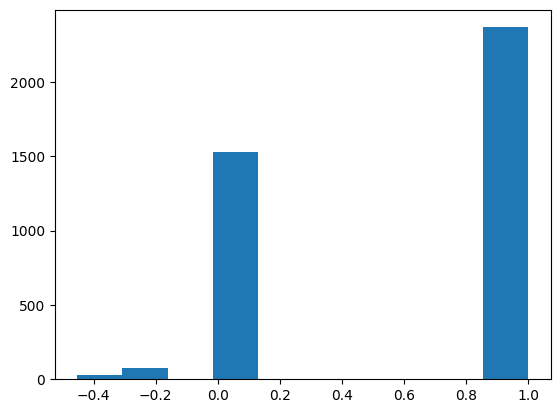

In [80]:
plt.hist(adjacency_matrix[ind_list])

In [69]:
#code to calculate weighted graph metrics
for u,v,data in subject1_graph.edges(data=True):
    data["cost"]=1/(np.abs(data["weight"]))
    data["abs_weight"]=np.abs(data["weight"])


In [47]:
# a code to calculate weighted E_glob
def weighted_global_efficiency(graph):

    E_glob=0
    n=len(graph)
    for u in range(n):
        for v in range(u+1,n):

            E_glob+=(nx.shortest_path_length(graph,u,v,weight="cost"))**(-1)

    E_glob=2*E_glob/(n*(n-1))

    return E_glob


abs_weight_values=np.array([dic["abs_weight"] for dic in list(zip(*list(subject1_graph.edges(data=True))))[-1]])
W=abs_weight_values.sum()

#creating null model

N = len(subject1_graph)
E = N*(N-1)/2
num_syn=int(0.5*E)

from scipy.sparse import coo_matrix

edge_inds = np.triu_indices(N, k=1)
inds_sample = np.random.choice(np.arange(len(edge_inds[0])), size=num_syn, replace=True)
A = coo_matrix((np.ones(num_syn), (edge_inds[0][inds_sample], edge_inds[1][inds_sample])), shape=(N, N)).toarray()
A = A + A.T 


In [48]:
null_model_graph=nx.from_numpy_array(A)
for u,v,data in null_model_graph.edges(data=True):
    data["cost"]=1/(np.abs(data["weight"]))
    data["abs_weight"]=np.abs(data["weight"])

In [49]:
e_null=weighted_global_cost_efficiency_ratio(null_model_graph)
e_null

0.0005

In [50]:
weighted_global_cost_efficiency_ratio(subject1_graph)/e_null

0.6

In [44]:
#all functions related to metrics_list

def total_functional_wiring(graph):
    abs_weight_values=np.array([dic["abs_weight"] for dic in list(zip(*list(graph.edges(data=True))))[-1]])
    W=abs_weight_values.sum()

    return np.round(W,3)

def average_node_degree(graph):
    return np.round(np.array(list(dict(graph.degree(weight="abs_weight")).values())).mean(),4)

def argmax_node_degree(graph):
    return np.round(np.argmax(np.array(list(dict(graph.degree(weight="abs_weight")).values()))),3)


def weighted_global_cost_efficiency_ratio(graph):
    
    E_glob=0
    n=len(graph)
    for u in range(n):
        for v in range(u+1,n):

            E_glob+=(nx.shortest_path_length(graph,u,v,weight="cost"))**(-1)

    E_glob=2*E_glob/(n*(n-1))

    abs_weight_values=np.array([dic["abs_weight"] for dic in list(zip(*list(graph.edges(data=True))))[-1]])
    W=abs_weight_values.sum()

    return np.round(E_glob/W,4)

def weighted_smallworldness(graph):

    C=nx.average_clustering(graph)
    L=nx.average_shortest_path_length(graph)

    N=len(graph)
    E=len(graph.edges())

    p=2*E/(N*(N-1))

    random_graph=nx.erdos_renyi_graph(N,p)

    C_random=nx.average_clustering(random_graph)
    L_random=nx.average_shortest_path_length(random_graph)

    return np.round((C/L)/(C_random/L_random),4)

def max_node_betweeness(graph):
    ind_max=np.argmax(np.array(list(nx.betweenness_centrality(subject1_graph,weight="cost").values())))
    max_value=np.max(np.array(list(nx.betweenness_centrality(subject1_graph,weight="cost").values())))

    return np.round(max_value,4), ind_max

def all_metric_values(graph,rois_labels):
    metric_dict={}
    
    metric_dict["total functional wiring"]=total_functional_wiring(graph)
    metric_dict["average node degree"]=average_node_degree(graph)
    metric_dict["argmax node degree"]=rois_labels[argmax_node_degree(graph)]
    metric_dict["binarized average clustering"]=np.round(nx.average_clustering(graph),3)
    metric_dict["cost-efficiency per null model ratio"]=np.round(weighted_global_cost_efficiency_ratio(graph)/e_null,4)
    metric_dict["density"]=np.round(nx.density(graph),3)
    metric_dict["binarized small-worldness"]=weighted_smallworldness(graph)
    max_val, ind=max_node_betweeness(graph)
    metric_dict["max node betweenness"]=max_val
    metric_dict["argmax node betweenness"]=rois_labels[ind]
    
    return metric_dict

In [53]:
metrics_dict

{'total functional wiring': 3111.0,
 'average node degree': 69.1333,
 'argmax node degree': 'Right Paracentral Lobule',
 'binarized average clustering': 0.893,
 'cost-efficiency per null model ratio': 0.6,
 'density': 0.777,
 'binarized small-worldness': 1.1609,
 'max node betweenness': 0.0102,
 'argmax node betweenness': 'Right Paracentral Lobule'}

In [56]:
#handling all signals
from nilearn.connectome import ConnectivityMeasure
import networkx as nx


data_frame=[]
for i in range(1,100,20):
    
    signal=all_signals[i]
    connectome = ConnectivityMeasure(kind='correlation')
    adjacency_matrix = connectome.fit_transform([signal])[0]
    np.fill_diagonal(adjacency_matrix,0)
    adjacency_matrix[(adjacency_matrix>-0.3)&(adjacency_matrix<0.3)]=0
    subject_graph=nx.from_numpy_array(adjacency_matrix)
    
    if nx.is_connected(subject_graph):
        for u,v,data in subject_graph.edges(data=True):
            data["cost"]=1/(np.abs(data["weight"]))
            data["abs_weight"]=np.abs(data["weight"])

        metrics_dict=all_metric_values(subject_graph,labels[0:90])
        metrics_dict["label"]=abide_data["phenotypic"]["DX_GROUP"].iloc[i]
        data_frame.append(metrics_dict)

    del subject_graph,adjacency_matrix

df=pd.DataFrame(data_frame)

#df.to_csv("network_metrics.csv")

In [57]:
df

,total functional wiring,average node degree,argmax node degree,binarized average clustering,cost-efficiency per null model ratio,density,binarized small-worldness,max node betweenness,argmax node betweenness,label
0,1091.705,24.2601,Right Lingual Gyrus,0.756,0.6,0.593,1.2618,0.0102,Right Paracentral Lobule,1
1,683.257,15.1835,Right Superior Occipital Gyrus,0.601,1.0,0.376,1.6584,0.0102,Right Paracentral Lobule,2
2,1165.334,25.8963,Right Middle Cingulate Cortex,0.775,0.6,0.594,1.3028,0.0102,Right Paracentral Lobule,2
3,1567.606,34.8357,Right Inferior Temporal Gyrus,0.852,0.6,0.732,1.1881,0.0102,Right Paracentral Lobule,2
4,1186.628,26.3695,Right Middle Cingulate Cortex,0.772,0.6,0.598,1.2973,0.0102,Right Paracentral Lobule,1


In [6]:
#handling all signals
from nilearn.connectome import ConnectivityMeasure
import networkx as nx


new_series=[]
for i in range(len(all_signals)):
    
    signal=all_signals[i]
    connectome = ConnectivityMeasure(kind='partial correlation')
    adjacency_matrix = connectome.fit_transform([signal])[0]
    np.fill_diagonal(adjacency_matrix,0)
    adjacency_matrix[(adjacency_matrix>-0.05)&(adjacency_matrix<0.05)]=0
    subject_graph=nx.from_numpy_array(adjacency_matrix)
    n_pos=0
    n_neg=0
    if nx.is_connected(subject_graph):
        for u,v,data in subject_graph.edges(data=True):
            w=data["weight"]

            if w>0:
                n_pos+=1
            else:
                n_neg+=1
        
        pos_neg_ratio=n_pos/n_neg
        new_series.append(pos_neg_ratio)

    del subject_graph,adjacency_matrix

new_series=pd.Series(new_series)


In [7]:
new_series

0      1.295906
1      1.277959
2      1.374507
3      1.276730
4      1.327381
         ...   
836    1.223769
837    1.219769
838    1.346829
839    1.392053
840    1.370370
Length: 841, dtype: float64

In [12]:
df_metrics=pd.read_csv("network_metrics.csv")

df_metrics.insert(0, "pos/neg links ratio", new_series)
df_metrics.drop(["Unnamed: 0"],axis=1,inplace=True)
df_metrics.head()

,pos/neg links ratio,total functional wiring,average node degree,argmax node degree,binarized average clustering,cost-efficiency per null model ratio,density,binarized small-worldness,max node betweenness,argmax node betweenness,label
0,1.295906,201.393,4.4754,Right Lingual Gyrus,0.525,1.25,0.490,1.0993,0.0449,Left Amygdala,1
1,1.277959,219.747,4.8833,Right Amygdala,0.541,1.25,0.524,1.0509,0.0419,Left Angular Gyrus,1
2,1.374507,178.220,3.9604,Left Angular Gyrus,0.482,1.25,0.451,1.0333,0.0546,Left Angular Gyrus,1
3,1.276730,180.507,4.0113,Left Heschls Gyrus,0.479,1.25,0.452,1.0896,0.0541,Left Heschls Gyrus,1
4,1.327381,202.888,4.5086,Right Mid Orbital Gyrus,0.523,1.25,0.488,1.1117,0.0421,Right Amygdala,1


<Axes: xlabel='label', ylabel='pos/neg links ratio'>

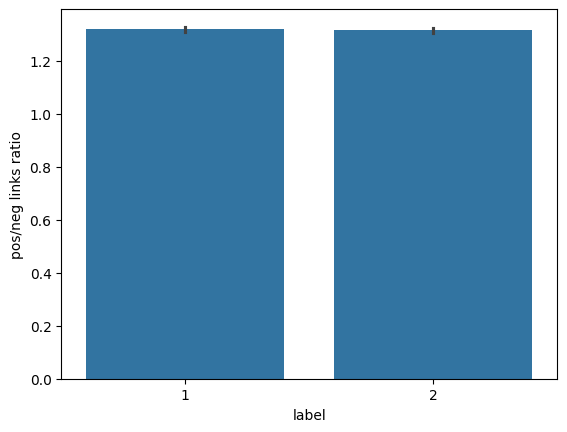

In [13]:
import seaborn as sb

sb.barplot(df_metrics, x="label", y="pos/neg links ratio", estimator="mean")

In [14]:
df_metrics.groupby("label").size()

label
1    387
2    454
dtype: int64